In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head(10)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0
5,a,d,h,-0.363289,1.299002,0.104014,-1.751211,-2.349948,-1.923294,-0.418514,...,-0.706863,0.342592,1.991692,-0.836287,-1.160102,1.449591,2.574510,-0.440837,1.449591,0.0
6,c,f,i,-0.410877,1.039321,0.315178,1.509918,0.111786,-0.796499,0.939016,...,1.708404,-0.873505,-0.863975,0.271783,0.225705,-1.880563,-0.582780,-1.506143,-1.880563,1.0
7,c,f,g,1.297811,1.028758,-1.102570,1.114708,-0.149282,-0.885268,0.763245,...,-0.158692,-0.714875,-0.534512,-0.868953,0.072839,-1.464710,-0.232019,-1.340323,-1.464710,1.0
8,a,d,h,-0.460268,0.558453,-0.108822,-0.822176,-1.057694,-0.844516,-0.210255,...,0.482099,0.174609,0.914762,-0.293144,-0.526213,0.695586,1.169728,-0.162056,0.695586,0.0
9,a,e,g,-1.035275,-0.036491,0.550507,-0.213803,-0.113949,-0.013036,-0.103330,...,-0.850049,0.094056,0.166073,0.047016,-0.071659,0.233959,0.166425,0.116590,0.233959,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

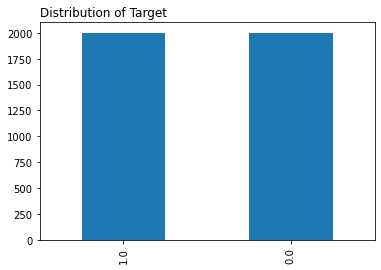

In [3]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [5]:
df_numerical = X_train.select_dtypes(exclude= "object")
df_numerical_cols = df_numerical.columns.tolist()
df_categorical = X_train.select_dtypes(include='object')
df_categorical_cols = df_categorical.columns.tolist()
df_categorical_cols

['var0', 'var1', 'var2']

In [6]:
# Insert Code
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('scale', StandardScaler())])

car_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, df_numerical_cols),
                                                      ('create_dummies', car_pipeline, df_categorical_cols)])


In [7]:
# Using PCA to reduce the data into 2d format

from sklearn.decomposition import PCA

pip_2d = Pipeline([('data_processing', processing_pipeline),
                   ('pca', PCA(n_components=2))
                  ])
data_2d = pip_2d.fit_transform(X_train)



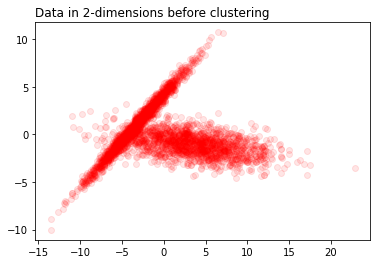

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data_2d[:,0], data_2d[:,1], 'ro', alpha=0.10)
plt.title('Data in 2-dimensions before clustering', loc='left')
plt.show()

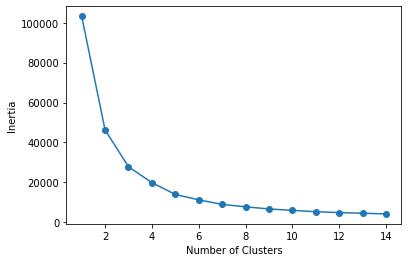

In [9]:
from sklearn.cluster import KMeans

distortions = list()

for i in range(1, 15):
   
    km = KMeans(n_clusters=i, random_state=0)
    km = km.fit(data_2d)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Based on the above graph near 5-6 graph kinks.

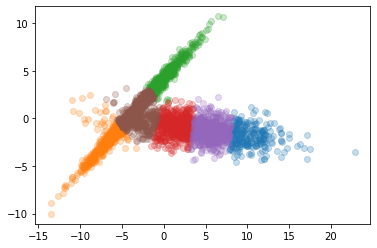

In [10]:
from sklearn.cluster import KMeans

n = 6

km = KMeans(n_clusters=n, random_state=0)
km = km.fit(data_2d)
pclusters = km.predict(data_2d)

for i in range(n):
    plt.scatter(data_2d[pclusters==i, 0], data_2d[pclusters==i, 1], alpha=0.25)
plt.show()

From the elbow method graph we got n_clusters= 6 is a optimum value. This graph shows that even though the data points are very close to each other and the overall shape is also a bit weird it has given a fair result. It has some noise but overall all performance is good. 

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [11]:
# Insert Code

from sklearn.linear_model import LogisticRegression

num_pipeline = Pipeline([('scale', StandardScaler())])

car_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, df_numerical_cols),
                                                      ('create_dummies', car_pipeline, df_categorical_cols)])
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='none'))])

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.model_selection import GridSearchCV
import time
start = time.process_time()
# your code here    

param_grid = [{'logreg__class_weight': [None, 'balanced'], 'logreg__C':[0.001,0.01, 0.1, 10.0,100]}]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, refit=True, cv=15)
gcv_results = gcv_results.fit(X_train, y_train)
print(time.process_time() - start)


51.337835


In [14]:
gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                       

In [15]:
y_testp = gcv_results.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.92       800
weighted avg       0.93      0.93      0.92       800



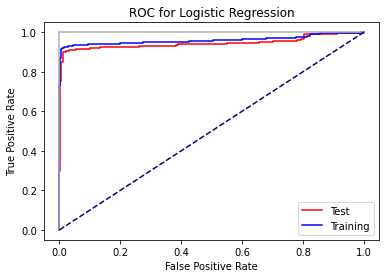

In [16]:

from sklearn.metrics import roc_curve

def probs(X, model=gcv_results):
    return model.predict_proba(X)[:, 1]

def generate_roc(y_test, y_testp):
    fpr, tpr,_ = roc_curve(y_test, y_testp)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.title('ROC for Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

If we use GridsearchCV on the logistic regression model it has given the best model with hyperparameter value C=0.001. Performance of the model is good with precision-0.87, recall- 0.99 and accuracy 0.93. The ROC curve for test data is very close to the training data values so models overall performance is reasonable. 

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [17]:
from sklearn.preprocessing import StandardScaler


X_train_std = processing_pipeline.fit_transform(X_train)

X_test_std  = processing_pipeline.fit_transform(X_test)




In [18]:
p = Pipeline([('data_processing', processing_pipeline), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])


start = time.process_time()
   

params = {'model__C': [0.01, 0.1, 1,10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search_pca = GridSearchCV(p, param_grid=params, scoring= 'accuracy', cv=10, refit=True)
grid_search_pca = grid_search_pca.fit(X_train, y_train)
print(time.process_time() - start)


54.89021699999999


In [19]:
grid_search_pca.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                       

In [20]:

y_testp_pca = grid_search_pca.predict(X_test)

In [21]:
print(classification_report(y_test, y_testp_pca))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



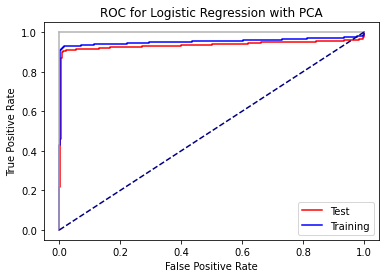

In [22]:

from sklearn.metrics import roc_curve

def probs(X, model=grid_search_pca):
    return model.predict_proba(X)[:, 1]

def generate_roc(y_test, y_testp_pca):
    fpr, tpr,_ = roc_curve(y_test, y_testp_pca)
    return fpr, tpr
    
fpr_test_pca, tpr_test_pca = generate_roc(y_test, probs(X_test))
fpr_train_pca, tpr_train_pca = generate_roc(y_train, probs(X_train))

plt.plot(fpr_test_pca, tpr_test_pca,'-r')
plt.plot(fpr_train_pca, tpr_train_pca,'-b')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.title('ROC for Logistic Regression with PCA')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In this model we have added PCA as a preprocessing step in the pipeline and we have used GridSearchCV to find the optimum number of components we want to reduce our data to. This gave n-component =6 and value C=10 for the model. This model performed slightly better with precision value 0.88.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [23]:
p = Pipeline([('data_processing', processing_pipeline),
             ('kmeans', KMeans()),
              ('logreg', LogisticRegression(penalty='none'))])

In [24]:
import time
start = time.process_time()
# your code here    

params = {'logreg__C': [0.01, 0.1, 1, 10], 'kmeans__n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search_kmeans = GridSearchCV(p, param_grid=params, scoring= 'accuracy', cv=10, refit=True)
grid_search_kmeans = grid_search_kmeans.fit(X_train, y_train)

print('time:',time.process_time() - start)


time: 349.163136


In [25]:
grid_search_kmeans.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                       

In [26]:
y_testp_kmeans = grid_search_kmeans.predict(X_test)

In [27]:
print(classification_report(y_test, y_testp_kmeans))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       394
         1.0       0.99      0.90      0.95       406

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



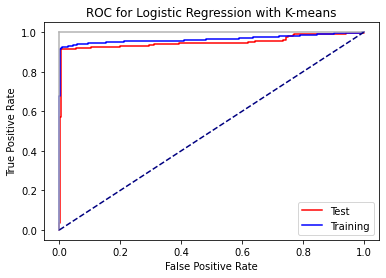

In [28]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=grid_search_kmeans):
    return model.predict_proba(X)[:, 1]

def generate_roc(y_test, y_testp_kmeans):
    fpr, tpr,_ = roc_curve(y_test, y_testp_kmeans)
    return fpr, tpr
    
fpr_test_kmeans, tpr_test_kmeans = generate_roc(y_test, generate_probs(X_test))
fpr_train_kmeans, tpr_train_kmeans = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test_kmeans, tpr_test_kmeans,'-r')
plt.plot(fpr_train_kmeans, tpr_train_kmeans,'-b')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression with K-means')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()


Compared to the other two models, this model has K-means as a preprocessing step in its pipeline. GridsearchCV has given hyperparameter values as KMeans(n_clusters=6)and C=0.01. It has boosted the accuracy of the model to 0.95 with precision 0.91. So far this is the best performing model amongst all of the other models. 

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

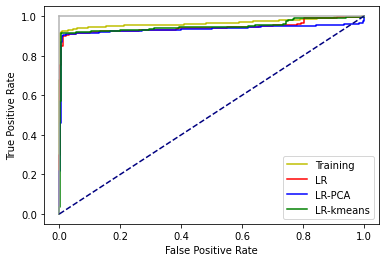

In [29]:
plt.plot(fpr_train_kmeans, tpr_train_kmeans,'-y')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_test_pca, tpr_test_pca,'-b')
plt.plot(fpr_test_kmeans, tpr_test_kmeans,'-g')

plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Training','LR','LR-PCA','LR-kmeans'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

To compare all the models plotted ROC on a single graph. Since the performance difference between each model is very slight these ROC curves are overlapping on each other and not showing much of difference to analyze. 

Lets try comparing roc_auc_score.

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_testp))

roc_auc_score for Logistic Regression:  0.925958340626641


In [31]:

print('roc_auc_score for Logistic Regression with PCA: ', roc_auc_score(y_test, y_testp_pca))

roc_auc_score for Logistic Regression with PCA:  0.930921957440424


In [32]:

print('roc_auc_score for Logistic Regression with K-means: ', roc_auc_score(y_test, y_testp_kmeans))

roc_auc_score for Logistic Regression with K-means:  0.9482008451901678


Based on the score Logistic Regression with K-means as preprocessing step models has the best performance. If we compare precision ,recall and accuracy for all three models, logistic regression and logistic regression with PCA both have 0.87, 0.99 and  0.93 respectively. LR with k-means has precision-0.91, recall- 0.99 and accuracy-0.95 . 

One important parameter we need to consider in this comparison is the computational time taken by all the models.

- LR- 50
- LR_PCA- 54
- LR_Kmeans- 346

Kmeans took 7x more computational time than other two models which increased the accuracy by 0.02 which doesn't seem efficient. Considering all these I would recommend using Logistic regression with PCA as a preprocessing step which gives pretty good results without increasing computational cost.
